In [76]:
#import dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [77]:
#Use to allow colab access to GoogleDrive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import glob

# Search for the file across all of MyDrive
file_path = glob.glob('/content/drive/MyDrive/**/*Happiness_Data.xlsx', recursive=True)
print(file_path)

['/content/drive/MyDrive/Colab Notebooks/Project4/Happiness_Data.xlsx']


In [79]:
import pandas as pd
import os

#Replace Folder Name with actual folder name
file_path = '/content/drive/MyDrive/Colab Notebooks/Project4/Happiness_Data.xlsx'



#Read the excel file
happiness_df = pd.read_excel(file_path)

happiness_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


In [80]:
#Use ETL to begin cleaning the data

#Get list of column names
happiness_df.columns.tolist()

['Country name',
 'year',
 'Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

In [81]:
#Rename one of the columns
no_null_happiness_df = happiness_df
no_null_happiness_df = no_null_happiness_df.rename(columns= {"year": "Year"})
no_null_happiness_df.columns.tolist()

['Country name',
 'Year',
 'Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

In [82]:
# Determine the number of unique values in each column.
no_null_happiness_df.nunique()

,0
Country name,165
Year,19
Life Ladder,2363
Log GDP per capita,2334
Social support,2350
Healthy life expectancy at birth,1126
Freedom to make life choices,2326
Generosity,2282
Perceptions of corruption,2238
Positive affect,2339


In [83]:
#Calculate the correlation between Life Ladder and other features

#Import dependencies for possible slope equation, we want to run an anova test
#to see if the features are statistically significant to the happiness/Life Ladder

from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
import numpy as np
from sklearn import datasets

clean_happiness_df = no_null_happiness_df


*groups is the Python unpacking operator (also called the "splat" operator). When using stats.f_oneway(), this allows us to pass multiple arrays as separate arguments.

In [84]:

def perform_anova(clean_happiness_df, feature, target):
    # Method 1: Manual binning using percentiles
    bins = [
        clean_happiness_df[feature].min(),
        clean_happiness_df[feature].quantile(0.25),
        clean_happiness_df[feature].quantile(0.5),
        clean_happiness_df[feature].quantile(0.75),
        clean_happiness_df[feature].max()
    ]
    clean_happiness_df['feature_bins'] = pd.cut(clean_happiness_df[feature], bins=bins)

    # Collect Life Ladder values for each bin
    groups = [group[target].values for name, group in clean_happiness_df.groupby('feature_bins')]

    # Perform one-way ANOVA
    f_statistic, p_value = stats.f_oneway(*groups)

    return f_statistic, p_value

# List of features
features = [
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy at birth',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption',
    'Positive affect',
    'Negative affect'
]

# Store results
anova_results = {}

# Run ANOVA for each feature
for feature in features:
    f_statistic, p_value = perform_anova(clean_happiness_df, feature, 'Life Ladder')
    anova_results[feature] = {
        'F-statistic': f_statistic,
        'p-value': p_value
    }

# Print results
for feature, results in anova_results.items():
    print(f"ANOVA Results for {feature}:")
    print()
    print(f"F-statistic: {results['F-statistic']:.4f}")
    print()
    print(f"p-value: {results['p-value']:.4f}")
    print()
    print("Statistically significant" if results['p-value'] < 0.05 else "Not statistically significant")
    print()


ANOVA Results for Log GDP per capita:

F-statistic: 1246.9248

p-value: 0.0000

Statistically significant

ANOVA Results for Social support:

F-statistic: 874.1956

p-value: 0.0000

Statistically significant

ANOVA Results for Healthy life expectancy at birth:

F-statistic: 1013.0566

p-value: 0.0000

Statistically significant

ANOVA Results for Freedom to make life choices:

F-statistic: 307.0536

p-value: 0.0000

Statistically significant

ANOVA Results for Generosity:

F-statistic: 44.8425

p-value: 0.0000

Statistically significant

ANOVA Results for Perceptions of corruption:

F-statistic: 134.8096

p-value: 0.0000

Statistically significant

ANOVA Results for Positive affect:

F-statistic: 262.1806

p-value: 0.0000

Statistically significant

ANOVA Results for Negative affect:

F-statistic: 100.4659

p-value: 0.0000

Statistically significant



<ipython-input-84-87cac6ffd2eb>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[target].values for name, group in clean_happiness_df.groupby('feature_bins')]
<ipython-input-84-87cac6ffd2eb>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[target].values for name, group in clean_happiness_df.groupby('feature_bins')]
<ipython-input-84-87cac6ffd2eb>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this w

In [85]:
#Begin with Random Forest Model
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


In [86]:
# Drop the non-beneficial ID columns, 'Country Name'
complete_happiness_df = no_null_happiness_df.drop(columns = ['Country name', 'Year', 'feature_bins'])
complete_happiness_df

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...
2358,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


In [87]:
#See what kind of datatype is in each column
complete_happiness_df.dtypes

,0
Life Ladder,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy at birth,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Positive affect,float64
Negative affect,float64


In [88]:
# Define features set, Want to predict the overall happiness, (X) Target: Life ladder (happiness), Features are all other columns

X = complete_happiness_df.copy()
X.drop("Life Ladder", axis=1, inplace=True)
X.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [89]:
# Define target vector
y = complete_happiness_df["Life Ladder"].ravel()
y[:5]

<ipython-input-89-d528e1f01d51>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = complete_happiness_df["Life Ladder"].ravel()


array([3.7235899 , 4.40177822, 4.75838089, 3.83171916, 3.78293753])

In [90]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [91]:
#Fit the Random Forest Model

# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=10, min_samples_split=10, max_features='sqrt', min_samples_leaf=1)

# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [92]:
# Making predictions using the testing data
test_predictions = rf_model.predict(X_test)

In [93]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2783212132979737, 'Log GDP per capita'),
 (0.2284917074932369, 'Healthy life expectancy at birth'),
 (0.20059978833329373, 'Social support'),
 (0.09487950848562945, 'Positive affect'),
 (0.08318859457806659, 'Freedom to make life choices'),
 (0.05821435099636572, 'Perceptions of corruption'),
 (0.03019022981616664, 'Negative affect'),
 (0.026114606999267258, 'Generosity')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

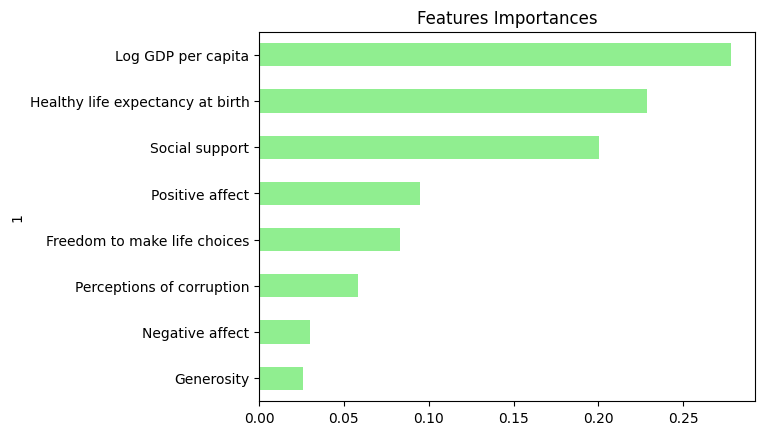

In [94]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [95]:
# Calculating the accuracy score
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, test_predictions)
mae

0.34181988674111063

In [96]:
#Calculate the mse and rmse
from sklearn.metrics import mean_squared_error

y_actual = y_test
# Calculate MSE
mse = mean_squared_error(y_actual, test_predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")



Mean Squared Error (MSE): 0.2042755741558467
Root Mean Squared Error (RMSE): 0.4519685543882967


In [97]:
#Calculate R-squared
from sklearn.metrics import r2_score
test_r2 = r2_score(y_test, test_predictions)
test_r2

0.8400425469379896

In [98]:
#overfit check, training > testing is overfit
train_predictions = rf_model.predict(X_train)
training_r2 = r2_score(y_train, train_predictions)
training_r2

0.9305708797069526